<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_Mandiri_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path ="/content/drive/MyDrive/Praktikum_ML/Praktikum_05/"

Mounted at /content/drive


**1. Import Modul**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**2. Loading Dataset**

In [4]:
df = pd.read_csv(path + "Data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Menampilkan informasi detail dengan df.info()**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**3. Data Preprocessing**

Cek Missing Value

In [6]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Cek dan Hapus Data Duplikat

In [7]:
print("\nData Duplikat:", df.duplicated().sum())



Data Duplikat: 0


Mengubah Nama Kolom

In [8]:
df = df.rename(columns={
    'SepalLengthCm': 'panjang_dkelopak_cm',
    'SepalWidthCm': 'lebar_dkelopak_cm',
    'PetalLengthCm': 'panjang_dmahkota_cm',
    'PetalWidthCm': 'lebar_dmahkota_cm',
    'Species': 'jenis'
})

**4. Data Understanding (Exploratory Data Analysis)**

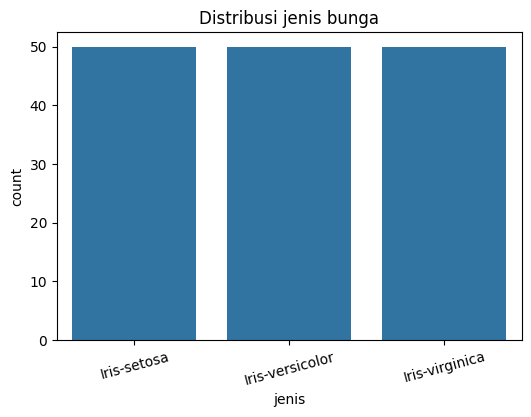

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='jenis', data=df)
plt.title('Distribusi jenis bunga')
plt.xticks(rotation=15)
plt.show()

**5. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)**

In [15]:
jenis_cat = df['jenis'].astype('category')
jenis_classes = list(jenis_cat.cat.categories)
df['jenis'] = jenis_cat.cat.codes

df.head()
print("\nKelas Target:", jenis_classes)



Kelas Target: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


**6. Analisis Korelasi Antar Fitur**

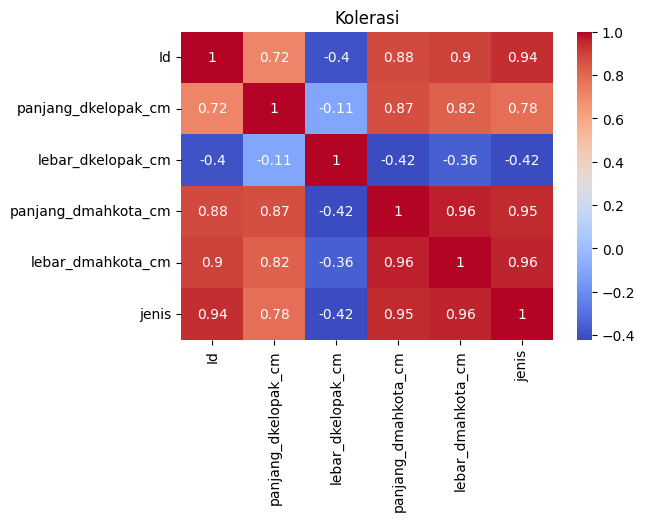

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Kolerasi')
plt.show()


**7. Splitting Data (Pembagian Data Training dan Testing)**

Menentukan Fitur dan Target

In [17]:
feature = ['panjang_dkelopak_cm','lebar_dkelopak_cm','panjang_dmahkota_cm','lebar_dmahkota_cm',]

X = df[feature]
y = df['jenis']

print("\nBentuk data Fitur (X):", X.shape)
print("Bentuk data Target (y):", y.shape)


Bentuk data Fitur (X): (150, 4)
Bentuk data Target (y): (150,)


Membagi Dataset menjadi Training dan Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nJumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Jumlah data training: 120
Jumlah data testing: 30


**8. Pembuatan Model Decision Tree**

In [19]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

**9. Evaluasi Model Decision Tree**

In [21]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=jenis_classes))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



**10. Visualisasi Hasil Model Decision Tree**

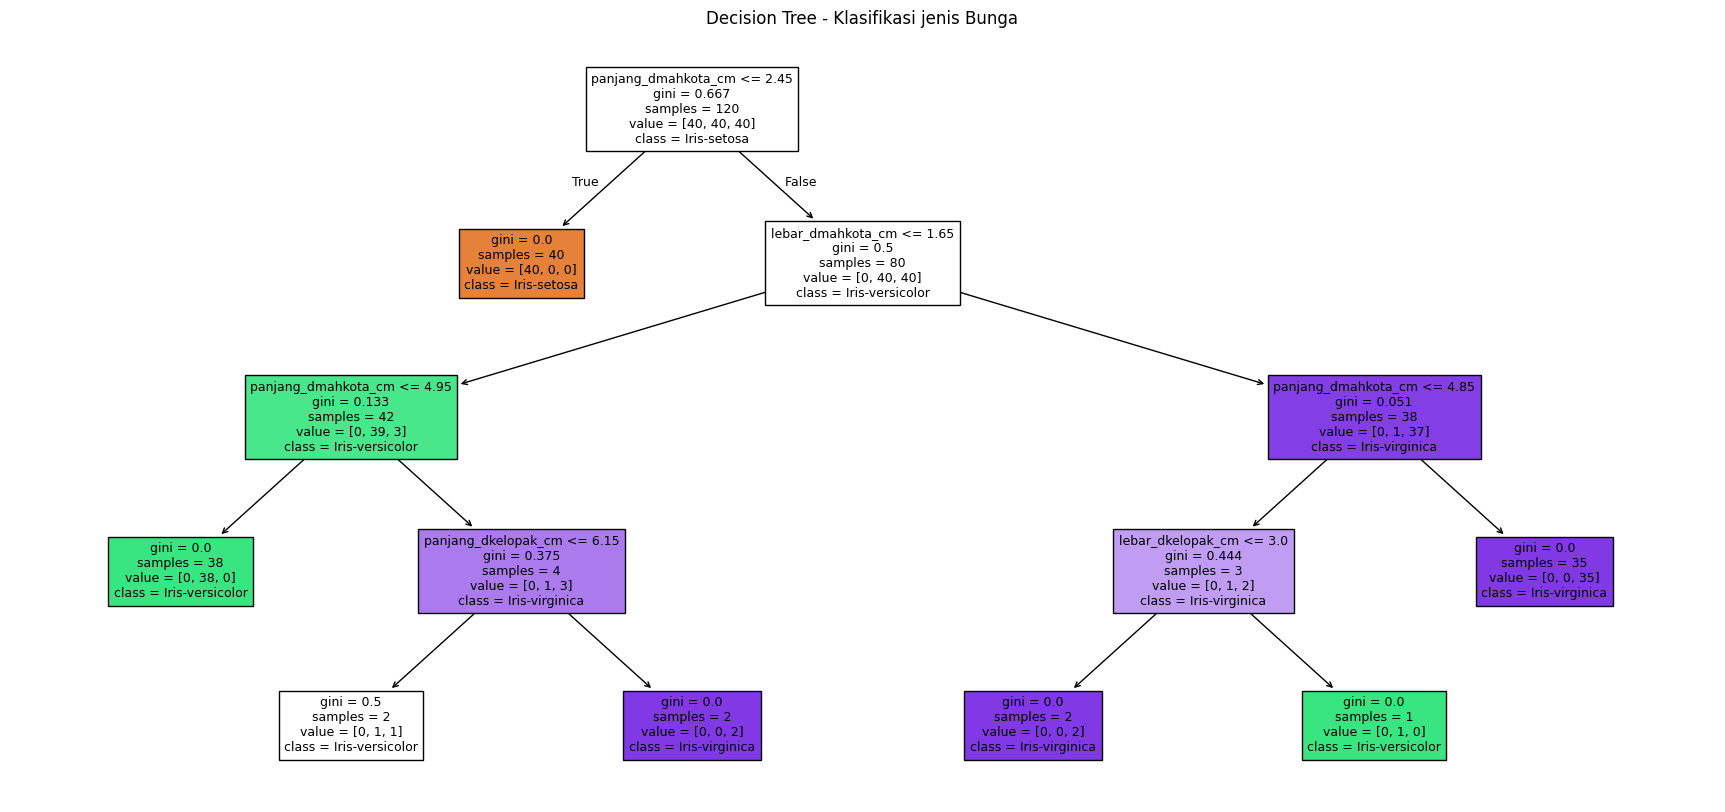

In [23]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature,
    class_names=jenis_classes,
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi jenis Bunga")
plt.show()

**11. Feature Importance (Fitur yang Paling Berpengaruh)**

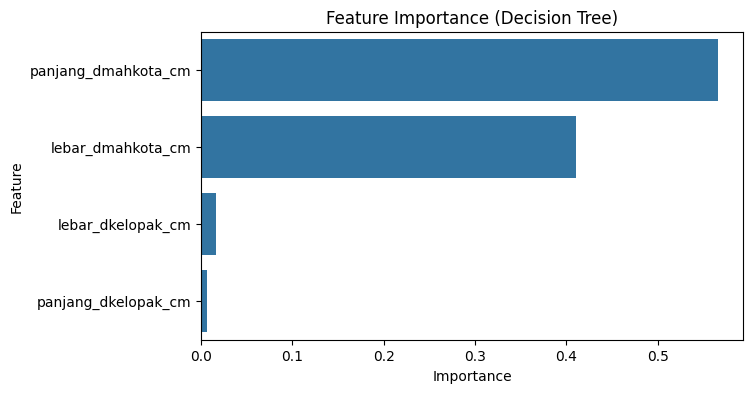

,0
panjang_dmahkota_cm,0.565639
lebar_dmahkota_cm,0.411154
lebar_dkelopak_cm,0.016878
panjang_dkelopak_cm,0.006329


In [24]:
imp = pd.Series(dt.feature_importances_, index=feature).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

imp

**Hyperparameter Tuning (Menentukan max_depth Terbaik)**

In [25]:
scores = {}
for d in range(2, nine :=9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict (X_test))

  scores
  best_d = max(scores, key=scores.get)
print("Best max_Depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Best max_Depth: 3 | Acc: 96.67 %
